In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 02')

In [174]:
df.head(40)

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987
5,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,193,159.619165,170.268045
6,2021,September,Ballarat,Ballarat,A Crimes against the person,A30 Sexual offences,A30 Sexual offences,189,156.310996,166.739173
7,2021,September,Ballarat,Ballarat,A Crimes against the person,A40 Abduction and related offences,A41 Abduction,5,4.135212,4.411089
8,2021,September,Ballarat,Ballarat,A Crimes against the person,A40 Abduction and related offences,A42 False imprisonment,5,4.135212,4.411089
9,2021,September,Ballarat,Ballarat,A Crimes against the person,A50 Robbery,A51 Aggravated robbery,16,13.232677,14.115486


In [175]:
df["Total Population"] = (df["Incidents Recorded"] / df["LGA Rate per 100,000 population"] * 100000).astype(int)
df

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population",Total Population
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871,113350
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499,113350
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281,113350
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150,113350
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987,113350
...,...,...,...,...,...,...,...,...,...,...,...
50400,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F20 Transport regulation offences,F29 Other transport regulation offences,9,6.005445,6.005445,149863
50401,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F33 Liquor and tobacco licensing offences,6,4.003630,4.003630,149863
50402,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F39 Other government regulatory offences,7,4.670902,4.670902,149864
50403,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F91 Environmental offences,2,1.334543,1.334543,149864


In [176]:
popdf = df.groupby(['Year'])['Total Population'].agg('sum')
popdf.head(10)

Year
2012    409341133
2013    430284134
2014    433599264
2015    447430409
2016    465494643
2017    469287925
2018    476165036
2019    486654482
2020    489689698
2021    491367513
Name: Total Population, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

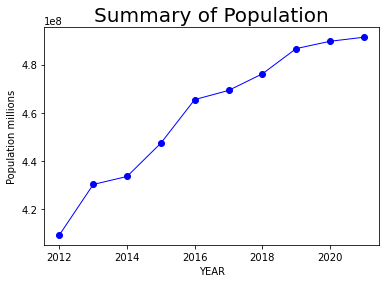

In [177]:
x = np.arange(2012,2022,1)
plt.plot(x,popdf, marker="o", color="blue", linewidth=1, label="Total")
plt.title("Summary of Population",fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("Population millions")
plt.show

## ANALYSIS OF "OFFENCE  TYPE" OVER 10 YEARS BY OFFENSE DIVISION

In [178]:
cdf = df.groupby(['Offence Subgroup'])['Incidents Recorded'].agg(['sum','mean','median',np.var,np.std])
cdf.rename(columns={'sum': 'Total Incidents','mean': 'Mean', 'median':'Median','var':'Variance','std':'Standard Deviation'}, inplace=True)
cdf.head(100)

,Total Incidents,Mean,Median,Variance,Standard Deviation
Offence Subgroup,,,,,
A10 Homicide and related offences,1807,3.221034,2.0,5.004628,2.237103
A211 FV Serious assault,77434,98.893997,70.0,9963.491307,99.817290
A212 Non-FV Serious assault,86087,109.386277,67.0,16127.494366,126.994072
"A22 Assault police, emergency services or other authorised officer",18199,24.297730,14.0,831.950008,28.843544
A231 FV Common assault,107174,136.007614,87.0,22693.692445,150.644258
...,...,...,...,...,...
F21 Public transport,1199,4.251773,3.0,16.915032,4.112789
F22 Aviation regulations offences,22,1.047619,1.0,0.047619,0.218218
F23 Maritime regulations offences,471,3.413043,2.0,11.251507,3.354327


In [179]:
cdf.to_excel('../Output_data/StatisticsOffenceDivision.xlsx')

In [180]:
Total = df.groupby(['Year'])['Incidents Recorded'].agg('sum')
Total.describe()

count        10.000000
mean     371043.600000
std       29772.239199
min      330937.000000
25%      347846.750000
50%      369855.000000
75%      393191.750000
max      410774.000000
Name: Incidents Recorded, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

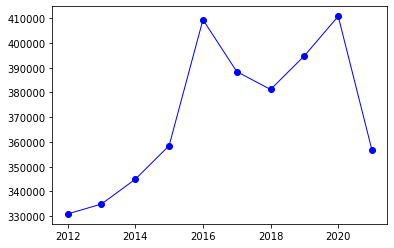

In [181]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="blue", linewidth=1, label="Total")
plt.show

In [182]:
Person = df[df['Offence Division']=='A Crimes against the person']
Person = Person.groupby(['Year'])['Incidents Recorded'].sum()
Person

Year
2012    45058
2013    48291
2014    49122
2015    50791
2016    57548
2017    60361
2018    61408
2019    64028
2020    63821
2021    64967
Name: Incidents Recorded, dtype: int64

In [183]:
Property = df[df['Offence Division']=='B Property and deception offences']
Property = Property.groupby(['Year'])['Incidents Recorded'].sum()
Property

Year
2012    230668
2013    226184
2014    228654
2015    231770
2016    266657
2017    242370
2018    232635
2019    239662
2020    223468
2021    194327
Name: Incidents Recorded, dtype: int64

In [184]:
Drugs = df[df['Offence Division']=='C Drug offences']
Drugs = Drugs.groupby(['Year'])['Incidents Recorded'].sum()
Drugs

Year
2012    11976
2013    13090
2014    14074
2015    15455
2016    15105
2017    14891
2018    15193
2019    16533
2020    18621
2021    14820
Name: Incidents Recorded, dtype: int64

In [185]:
Public = df[df['Offence Division']=='D Public order and security offences']
Public = Public.groupby(['Year'])['Incidents Recorded'].sum()
Public

Year
2012    26035
2013    27878
2014    26031
2015    25513
2016    23924
2017    24389
2018    23688
2019    23483
2020    18471
2021    17735
Name: Incidents Recorded, dtype: int64

In [186]:
Justice = df[df['Offence Division']=='E Justice procedures offences']
Justice = Justice.groupby(['Year'])['Incidents Recorded'].sum()
Justice

Year
2012    16153
2013    18634
2014    26243
2015    34144
2016    45374
2017    45598
2018    47575
2019    50321
2020    53411
2021    51950
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

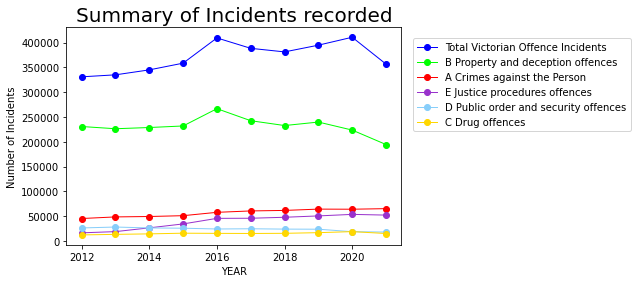

In [187]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="blue", linewidth=1, label="Total Victorian Offence Incidents")
plt.plot(x,Property, marker="o", color="lime", linewidth=1, label="B Property and deception offences")
plt.plot(x,Person, marker="o", color="red", linewidth=1, label="A Crimes against the Person")
plt.plot(x,Justice, marker="o", color="darkorchid", linewidth=1, label="E Justice procedures offences")
plt.plot(x,Public, marker="o", color="lightskyblue", linewidth=1, label="D Public order and security offences")
plt.plot(x,Drugs, marker="o", color="gold", linewidth=1, label="C Drug offences")

plt.legend(loc='lower right', bbox_to_anchor=(1.70, 0.50))
plt.title("Summary of Incidents recorded",fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("Number of Incidents")
plt.show

In [188]:
SplitProperty = df[df['Offence Division']=='B Property and deception offences']
SplitProperty

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population",Total Population
22,2021,September,Ballarat,Ballarat,B Property and deception offences,B10 Arson,B11 Cause damage by fire,70,57.892961,61.755249,113350
23,2021,September,Ballarat,Ballarat,B Property and deception offences,B10 Arson,B12 Cause a bushfire,2,1.654085,1.764436,113350
24,2021,September,Ballarat,Ballarat,B Property and deception offences,B10 Arson,B19 Other fire related offences,2,1.654085,1.764436,113350
25,2021,September,Ballarat,Ballarat,B Property and deception offences,B20 Property damage,B21 Criminal damage,681,563.215810,600.790354,113350
26,2021,September,Ballarat,Ballarat,B Property and deception offences,B20 Property damage,B22 Graffiti,65,53.757750,57.344160,113350
...,...,...,...,...,...,...,...,...,...,...,...
50368,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B40 Theft,B49 Other theft,622,415.042972,415.042972,149863
50369,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B50 Deception,B51 Forgery and counterfeiting,29,19.350878,19.350878,149863
50370,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B50 Deception,B52 Possess equipment to make false instrument,1,0.667272,0.667272,149863
50371,2012,September,Yarra Ranges,Yarra Ranges,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,103,68.728981,68.728981,149863


In [189]:
InciProperty = SplitProperty.groupby(['Offence Subdivision'])['Incidents Recorded'].sum()
InciProperty

Offence Subdivision
B10 Arson                         30142
B20 Property damage              364324
B30 Burglary/Break and enter     417734
B40 Theft                       1317748
B50 Deception                    186375
B60 Bribery                          72
Name: Incidents Recorded, dtype: int64

In [190]:
Damage = SplitProperty[SplitProperty['Offence Subdivision']=='B20 Property damage']
Damage = Damage.groupby(['Year'])['Incidents Recorded'].sum()
Damage

Year
2012    43351
2013    40173
2014    37140
2015    35596
2016    37539
2017    35984
2018    35007
2019    34298
2020    33030
2021    32206
Name: Incidents Recorded, dtype: int64

In [191]:
Theft = SplitProperty[SplitProperty['Offence Subdivision']=='B40 Theft']
Theft = Theft.groupby(['Year'])['Incidents Recorded'].sum()
Theft

Year
2012    127414
2013    122822
2014    127502
2015    130673
2016    153831
2017    135607
2018    134040
2019    141939
2020    132562
2021    111358
Name: Incidents Recorded, dtype: int64

In [192]:
Deception = SplitProperty[SplitProperty['Offence Subdivision']=='B50 Deception']
Deception = Deception.groupby(['Year'])['Incidents Recorded'].sum()
Deception

Year
2012    11363
2013    15002
2014    17012
2015    16749
2016    19679
2017    21281
2018    20794
2019    22932
2020    21951
2021    19612
Name: Incidents Recorded, dtype: int64

In [193]:
Bribery = SplitProperty[SplitProperty['Offence Subdivision']=='B60 Bribery']
Bribery = Bribery.groupby(['Year'])['Incidents Recorded'].sum()
Bribery

Year
2012    20
2013     7
2014     2
2015    20
2016     5
2017     5
2018     3
2019     5
2020     3
2021     2
Name: Incidents Recorded, dtype: int64

In [194]:
Burglary = SplitProperty[SplitProperty['Offence Subdivision']=='B30 Burglary/Break and enter']
Burglary = Burglary.groupby(['Year'])['Incidents Recorded'].sum()
Burglary

Year
2012    45356
2013    44609
2014    43716
2015    45650
2016    51628
2017    46455
2018    39734
2019    37609
2020    33701
2021    29276
Name: Incidents Recorded, dtype: int64

In [195]:
Arson = SplitProperty[SplitProperty['Offence Subdivision']=='B10 Arson']
Arson = Arson.groupby(['Year'])['Incidents Recorded'].sum()
Arson

Year
2012    3164
2013    3571
2014    3282
2015    3082
2016    3975
2017    3038
2018    3057
2019    2879
2020    2221
2021    1873
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

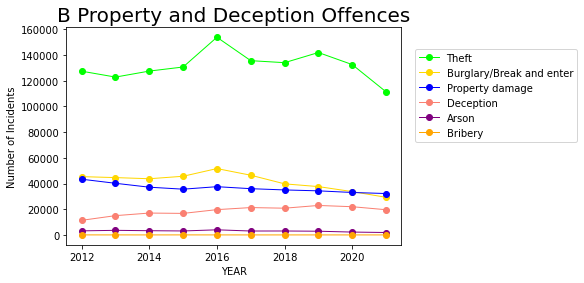

In [196]:
x = np.arange(2012,2022,1)
#plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,Theft, marker="o", color="lime", linewidth=1, label="Theft")
plt.plot(x,Burglary, marker="o", color="gold", linewidth=1, label="Burglary/Break and enter")
plt.plot(x,Damage, marker="o", color="blue", linewidth=1, label="Property damage")
plt.plot(x,Deception, marker="o", color="salmon", linewidth=1, label="Deception")
plt.plot(x,Arson, marker="o", color="purple", linewidth=1, label="Arson")
plt.plot(x,Bribery, marker="o", color="orange", linewidth=1, label="Bribery")
plt.legend(loc='lower right', bbox_to_anchor=(1.54, 0.45))
plt.title("B Property and Deception Offences",fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("Number of Incidents")
plt.show

In [197]:
TheftSplit = SplitProperty[SplitProperty['Offence Subdivision']=='B40 Theft']
TheftSplit = TheftSplit.groupby(['Offence Subgroup'])['Incidents Recorded'].sum()
TheftSplit.sort_values()

Offence Subgroup
B46 Fare evasion                             584
B44 Theft of a bicycle                     59087
B45 Receiving or handling stolen goods     60489
B41 Motor vehicle theft                   142467
B43 Steal from a retail store             181729
B49 Other theft                           380762
B42 Steal from a motor vehicle            492630
Name: Incidents Recorded, dtype: int64

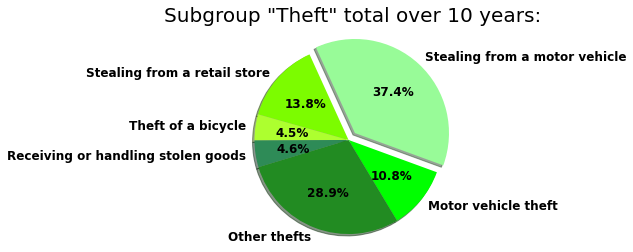

In [198]:
# Generate a pie plot showing the distribution of crime of Theft
pies = ["Motor vehicle theft","Stealing from a motor vehicle",
        "Stealing from a retail store",'Theft of a bicycle',
        'Receiving or handling stolen goods','Other thefts']
pie_count =[142467,492630,181729,59087,60489,381346]
colors = ["lime","palegreen","lawngreen","greenyellow","seagreen",'forestgreen']
explode = (0,0.1,0,0,0,0)
# Tell matplotlib to create a pie chart based upon the above data: 
plt.pie(pie_count, labels=pies, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=301,textprops= {'fontsize': 12, 'weight':'bold'})
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('Subgroup "Theft" total over 10 years:',fontsize = 20)
plt.show()

In [199]:
PersonPieSplit= df[df['Offence Division']=='A Crimes against the person']
PersonPieSplit = PersonPieSplit.groupby(['Offence Subdivision'])['Incidents Recorded'].sum()
PersonPieSplit.sort_values()

Offence Subdivision
A60 Blackmail and extortion                              1418
A10 Homicide and related offences                        1807
A40 Abduction and related offences                       4013
A50 Robbery                                             22799
A80 Dangerous and negligent acts endangering people     35032
A70 Stalking, harassment and threatening behaviour      64967
A30 Sexual offences                                     70080
A20 Assault and related offences                       365279
Name: Incidents Recorded, dtype: int64

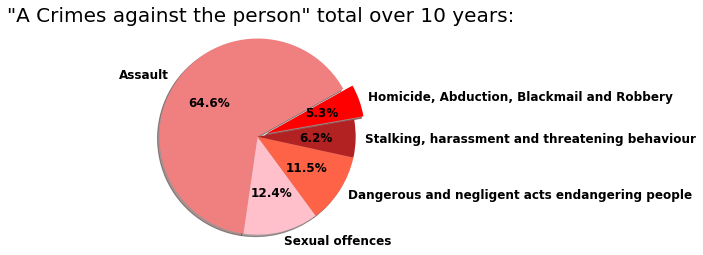

In [200]:
# Generate a pie plot showing the distribution of crime of Theft
pies = ["Homicide, Abduction, Blackmail and Robbery","Assault",
        "Sexual offences","Dangerous and negligent acts endangering people",
        'Stalking, harassment and threatening behaviour']
pie_count = [30037,365279,70080,64967,35032]
colors = ["r","lightcoral","pink",'tomato','firebrick']
explode = (0.1,0,0,0,0)
# Tell matplotlib to create a pie chart based upon the above data: 
plt.pie(pie_count, labels=pies, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10, wedgeprops = {'linewidth': 1},textprops= {'fontsize': 12, 'weight':'bold'})
#plt.legend(pies, loc="best", bbox_to_anchor=(0.82,0.80))
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('"A Crimes against the person" total over 10 years:',fontsize = 20)
plt.show()

In [201]:
PersonPieSplit= df[df['Offence Division']=='A Crimes against the person']
PersonPieSplit = PersonPieSplit.groupby(['Year'])['Incidents Recorded'].sum()
PersonPieSplit.sort_values()

Year
2012    45058
2013    48291
2014    49122
2015    50791
2016    57548
2017    60361
2018    61408
2020    63821
2019    64028
2021    64967
Name: Incidents Recorded, dtype: int64

In [202]:
PersonAssault= df[df['Offence Subdivision']=='A20 Assault and related offences']
PersonAssault = PersonAssault.groupby(['Year'])['Incidents Recorded'].sum()
PersonAssault.sort_values()

Year
2012    30247
2013    32468
2014    32654
2015    33132
2016    37152
2017    38136
2018    38771
2020    40725
2019    40845
2021    41149
Name: Incidents Recorded, dtype: int64

In [203]:
PersonSex= df[df['Offence Subdivision']=='A30 Sexual offences']
PersonSex = PersonSex.groupby(['Year'])['Incidents Recorded'].sum()
PersonSex.sort_values()

Year
2012    4891
2013    5338
2014    5543
2015    5981
2016    6798
2017    7915
2020    8194
2019    8201
2018    8375
2021    8844
Name: Incidents Recorded, dtype: int64

In [204]:
PersonNegligent= df[df['Offence Subdivision']=='A80 Dangerous and negligent acts endangering people']
PersonNegligent = PersonNegligent.groupby(['Year'])['Incidents Recorded'].sum()
PersonNegligent.sort_values()

Year
2012    2316
2013    2451
2014    2811
2015    3206
2016    3852
2019    3879
2021    3933
2020    4068
2018    4178
2017    4338
Name: Incidents Recorded, dtype: int64

In [205]:
PersonRobbery = df[df['Offence Subdivision']=='A50 Robbery']
PersonRobbery = PersonRobbery.groupby(['Year'])['Incidents Recorded'].sum()
PersonRobbery.sort_values()

Year
2015    1850
2014    1885
2021    1899
2013    1960
2016    2287
2012    2423
2018    2431
2017    2521
2020    2541
2019    3002
Name: Incidents Recorded, dtype: int64

In [206]:
PersonStalking= df[df['Offence Subdivision']=='A70 Stalking, harassment and threatening behaviour']
PersonStalking = PersonStalking.groupby(['Year'])['Incidents Recorded'].sum()
PersonStalking.sort_values()

Year
2012    4541
2013    5435
2014    5617
2015    5944
2016    6669
2017    6701
2018    6907
2019    7297
2020    7508
2021    8348
Name: Incidents Recorded, dtype: int64

In [207]:
PersonAbduction= df[df['Offence Subdivision']=='A40 Abduction and related offences']
PersonAbduction = PersonAbduction.groupby(['Year'])['Incidents Recorded'].sum()
PersonAbduction.sort_values()

Year
2014    322
2012    336
2015    371
2013    374
2018    408
2017    424
2020    429
2021    438
2019    446
2016    465
Name: Incidents Recorded, dtype: int64

In [208]:
PersonHomicide= df[df['Offence Subdivision']=='A10 Homicide and related offences']
PersonHomicide = PersonHomicide.groupby(['Year'])['Incidents Recorded'].sum()
PersonHomicide.sort_values()

Year
2013    147
2015    160
2014    175
2021    177
2012    181
2018    187
2016    191
2019    192
2020    197
2017    200
Name: Incidents Recorded, dtype: int64

In [209]:
PersonBlackmail= df[df['Offence Subdivision']=='A60 Blackmail and extortion']
PersonBlackmail = PersonBlackmail.groupby(['Year'])['Incidents Recorded'].sum()
PersonBlackmail.sort_values()

Year
2014    115
2013    118
2012    123
2017    126
2016    134
2015    147
2018    151
2020    159
2019    166
2021    179
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

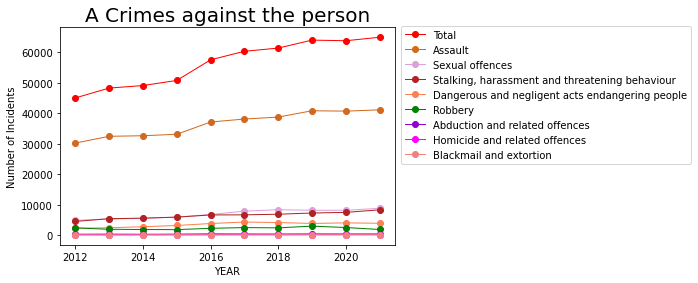

In [210]:
x = np.arange(2012,2022,1)
plt.plot(x,PersonPieSplit, marker="o", color="red", linewidth=1, label="Total")
plt.plot(x,PersonAssault, marker="o", color="chocolate", linewidth=1, label="Assault")
plt.plot(x,PersonSex, marker="o", color="plum", linewidth=1, label="Sexual offences")
plt.plot(x,PersonStalking, marker="o", color="firebrick", linewidth=1, label="Stalking, harassment and threatening behaviour")
plt.plot(x,PersonNegligent, marker="o", color="coral", linewidth=1, label="Dangerous and negligent acts endangering people")
plt.plot(x,PersonRobbery, marker="o", color="green", linewidth=1, label="Robbery")
plt.plot(x,PersonAbduction, marker="o", color="darkviolet", linewidth=1, label="Abduction and related offences")
plt.plot(x,PersonHomicide, marker="o", color="magenta", linewidth=1, label="Homicide and related offences")
plt.plot(x,PersonBlackmail, marker="o", color="lightcoral", linewidth=1, label="Blackmail and extortion")
plt.legend(loc='lower right', bbox_to_anchor=(1.9,0.35))
plt.title('A Crimes against the person',fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("Number of Incidents")
plt.show


In [211]:
DrugsPieSplit= df[df['Offence Division']=='C Drug offences']
DrugsPieSplit = DrugsPieSplit.groupby(['Offence Subgroup'])['Incidents Recorded'].sum()
DrugsPieSplit.sort_values()

Offence Subgroup
C22 Manufacture drugs                                         5
C11 Drug dealing                                            238
C99 Other drug offences                                     290
C23 Possess drug manufacturing equipment or precursor      3206
C31 Drug use                                               5258
C21 Cultivate drugs                                        8344
C12 Drug trafficking                                      28585
C32 Drug possession                                      103832
Name: Incidents Recorded, dtype: int64

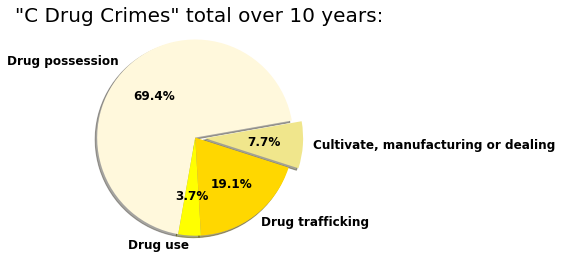

In [212]:
# Generate a pie plot showing the distribution of Drug crimes
pies = ['Drug possession','Drug use',"Drug trafficking","Cultivate, manufacturing or dealing"]
pie_count = [103832,5548,28585,11555]
colors = ["cornsilk","yellow","gold",'khaki']
explode = (0,0,0,0.1)
# Tell matplotlib to create a pie chart based upon the above data: 
plt.pie(pie_count, labels=pies, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10, wedgeprops = {'linewidth': 1},textprops= {'fontsize': 12, 'weight':'bold'})
# Create axes which are equal so we have a perfect circle and print to screen##
#plt.legend(pies, loc="best", bbox_to_anchor=(0.82,0.80))
plt.axis("equal")
plt.title('"C Drug Crimes" total over 10 years:',fontsize = 20)
plt.show()

In [213]:
OrderPieSplit= df[df['Offence Division']=='D Public order and security offences']
OrderPieSplit = OrderPieSplit.groupby(['Offence Subdivision'])['Incidents Recorded'].sum()
OrderPieSplit

Offence Subdivision
D10 Weapons and explosives offences      83444
D20 Disorderly and offensive conduct    135872
D30 Public nuisance offences             17508
D40 Public security offences               323
Name: Incidents Recorded, dtype: int64

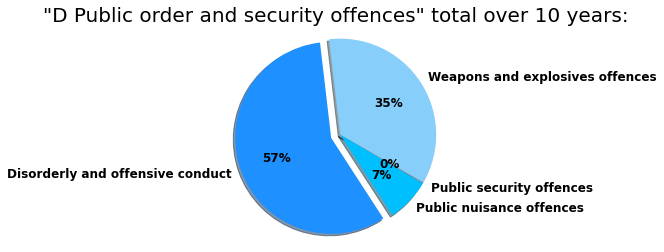

In [214]:
# Generate a pie plot showing the distribution of Drug crimes
pies = ["Weapons and explosives offences","Disorderly and offensive conduct","Public nuisance offences","Public security offences"]
pie_count = OrderPieSplit
colors = ["lightskyblue","dodgerblue","deepskyblue","lightslategrey"]
explode = (0,0.1,0,0)
# Tell matplotlib to create a pie chart based upon the above data: 
plt.pie(pie_count, labels=pies, explode=explode, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=330, wedgeprops = {'linewidth': 1},textprops= {'fontsize': 12, 'weight':'bold'})
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('"D Public order and security offences" total over 10 years:',fontsize = 20)
plt.show()

In [215]:
JusticePieSplit= df[df['Offence Division']=='E Justice procedures offences']
JusticePieSplit = JusticePieSplit.groupby(['Offence Subgroup'])['Incidents Recorded'].sum()
JusticePieSplit.sort_values()

Offence Subgroup
E12 Fail to appear                                          9
E11 Escape custody                                        851
E15 Prison regulation offences                           4582
E14 Pervert the course of justice or commit perjury      5234
E19 Other justice procedures offences                    9389
E29 Breach of other orders                               9975
E22 Breach intervention order                           17202
E13 Resist or hinder officer                            40043
E23 Breach bail conditions                             145337
E21 Breach family violence order                       156781
Name: Incidents Recorded, dtype: int64

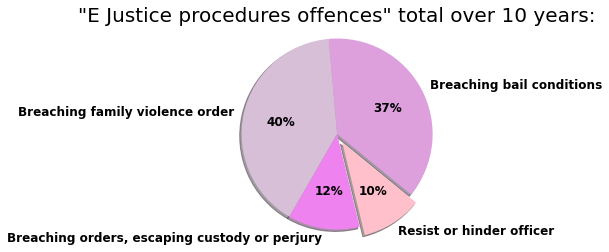

In [216]:
# Generate a pie plot showing the distribution of Justice crimes
pies = ["Breaching orders, escaping custody or perjury","Resist or hinder officer",
        "Breaching bail conditions","Breaching family violence order"]
pie_count = [47242,40043,145337,156781]
colors = ["violet","pink","plum","thistle"]
explode = (0,0.1,0,0)
# Tell matplotlib to create a pie chart based upon the above data: 
plt.pie(pie_count, labels=pies, explode=explode, colors=colors, textprops= {'fontsize': 12, 'weight':'bold'},
        autopct="%1.0f%%", shadow=True, startangle=240, wedgeprops = {'linewidth': 1})
#plt.legend(pies, loc="best",prop={'size': 12}, bbox_to_anchor=(0.82,0.80))
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('"E Justice procedures offences" total over 10 years:',fontsize = 20)
plt.show()

In [217]:
JusticePieSplit= df[df['Offence Division']=='E Justice procedures offences']
JusticePieSplit = JusticePieSplit.groupby(['Offence Subgroup'])['Incidents Recorded'].sum()
JusticePieSplit

Offence Subgroup
E11 Escape custody                                        851
E12 Fail to appear                                          9
E13 Resist or hinder officer                            40043
E14 Pervert the course of justice or commit perjury      5234
E15 Prison regulation offences                           4582
E19 Other justice procedures offences                    9389
E21 Breach family violence order                       156781
E22 Breach intervention order                           17202
E23 Breach bail conditions                             145337
E29 Breach of other orders                               9975
Name: Incidents Recorded, dtype: int64

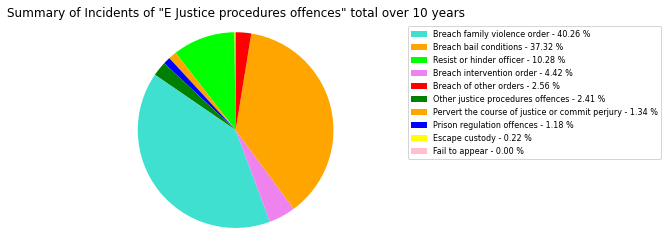

In [218]:
# Generate a pie plot showing the distribution of Drug crimes
x = ["Escape custody","Fail to appear","Resist or hinder officer","Pervert the course of justice or commit perjury",
        "Prison regulation offences","Other justice procedures offences","Breach family violence order","Breach intervention order",
        "Breach bail conditions","Breach of other orders"]
y = JusticePieSplit
colors = ["yellow","pink","lime","orange","blue","green","turquoise","violet","orange","red"]
explode = (0,0.1,0,0,0,0,0,0,0,0)

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(1, 1),
           fontsize=8)

#plt.savefig('piechart.png', bbox_inches='tight')

# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('Summary of Incidents of "E Justice procedures offences" total over 10 years')
plt.show()